#### MaxQuant protein level

png 
  2

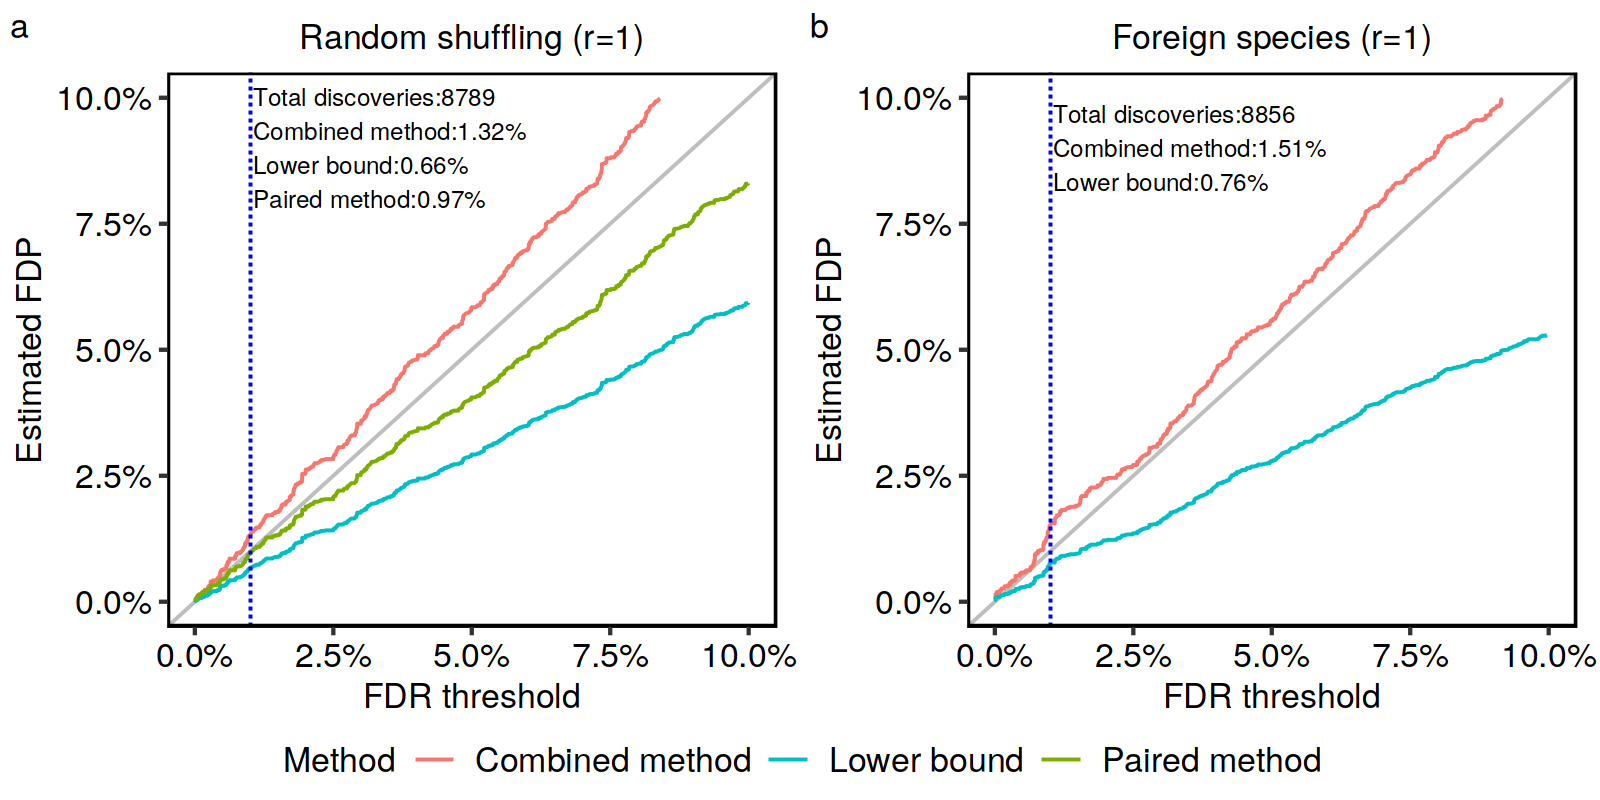

In [ ]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
color_mapping <- c("Paired method" = "#7CAE00", "Sample method" = "#C77CFF", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")

report_file <- "./random_shuffling/proteinGroups.txt"
pro_fdp_file <- run_maxquant_fdp_analysis(report_file,level = "protein",prefix = "maxquant-protein",k_fold=1)
#color_mapping <- c("Paired entrapment" = "blue", "Sample entrapment" = "red", "Lower bound" = "green", "Combined entrapment" = "purple")
gg1 <- plot_fdp_fdr_v2(pro_fdp_file,fdr_max = 0.1,fig_title=NULL,add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = 2)

report_file <- "./foreign_species/proteinGroups.txt"
pro_fdp_file2 <- run_maxquant_fdp_analysis(report_file,level = "protein",prefix = "maxquant-protein",r=1)
#color_mapping <- c("Paired entrapment" = "blue", "Sample entrapment" = "red", "Lower bound" = "green", "Combined entrapment" = "purple")
gg2 <- plot_fdp_fdr_v2(pro_fdp_file2,fdr_max = 0.1,fig_title=NULL,add_numbers = TRUE, color_mapping=color_mapping,fdr_decimal_place = 2)

options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 4*2, repr.plot.height = 4, repr.plot.res = 200)

library(cowplot)
legend <- as_ggplot(get_legend(gg1))+theme(legend.position = c(0.5, 0.5))
gg <- ggarrange(gg1+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = margin(0.3,0.3,0.05,0.2, "cm"),legend.box.spacing = unit(0, "pt"))+labs(title = "Random shuffling (r=1)"),
                gg2+theme(plot.title = element_text(size = 12, hjust = 0.5),plot.margin = margin(0.3,0.3,0.05,0.2, "cm"),legend.box.spacing = unit(0, "pt"))+labs(title = "Foreign species (r=1)"),
                legend = "bottom", common.legend=TRUE, ncol = 2, nrow = 1, align = "hv",labels = c("a", "b"),
                font.label = list(size = 12, color = "black", face = "plain"))
print(gg)


pdf("FigureS_maxquant_protein_level.pdf",width = 3.5*2,height = 3.5) 
print(gg)
dev.off()